In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

diamonds = sns.load_dataset('diamonds')


In [2]:
diamonds_df = pd.DataFrame(diamonds)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(
    f"diamond cut, color, and clarity are given by:\ncut: {diamonds_df.cut.nunique()},\ncolor: {diamonds_df.color.nunique()},\nclarity: {diamonds_df.clarity.nunique()}"
)


diamond cut, color, and clarity are given by:
cut: 5,
color: 7,
clarity: 8


In [4]:
diamonds_df.shape

(53940, 10)

In [5]:
# inclue=object to describe categorical variables
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Column selection

- Select specific columns from the dataset. Columns in pandsas dataframe can be accessed in two simple ways:
  - dot notation: . operator
  - bracket notation: [] operator
- Example:
  - diamonds_df.cut is equivalent to diamonds_df['cut']

## Note:

- There are situations where the dot operator cant be used:
  - When a column name contains spaces: diamonds*df.cut $\neq$ diamonds_df["\_cut*"] <- here "\_" is a "space"
  - when a column name is an integer: diamonds_df.1 $\neq$ diamonds_df[1]
  - _when creating a new column_

### Select all rows corresponding to diamonds that have the _Ideal_ cut and store them in a separate dataframe.

- Can be done using the `loc` functionality:


In [7]:
diamonds_low_df = diamonds_df.loc[diamonds_df['cut'] == 'Ideal']
diamonds_low_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [8]:
# Add price per carat column to the dataframe
diamonds_df['price_per_carat'] = diamonds_df['price'] / diamonds_df['carat']
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


> Look at _conditional addition of columns_. Add a column based on the value in `price_per_carat`, anything more than 3500 as high (coded as 1) and anything less than 3500 as low (coded as 0).


In [9]:
# [xv if c else yv for c, xv, yv in zip(condition, x, y)]
# [xz for xz in diamonds_df['price_per_carat'] if xz > 3500
diamonds_df['price_per_carat_high'] = np.where(
    diamonds_df['price_per_carat'] > 3500, 1, 0)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0


In [10]:
# Applying a simple function on the columns:
diamonds_df['price'] = diamonds_df['price'] * 1.3
# diamonds_df['price'].astype(int)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0


In [11]:
# round off the price of diamonds to its ceil
# diamonds_df.head()

# diamonds_df['price'] = diamonds_df.price.astype(int)
# diamonds_df


In [12]:
# diamonds_df['rounded_price'] = diamonds_df['price'] * 1.3
diamonds_df['rounded_price'] = diamonds_df['price'].apply(math.ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436


In [13]:
diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(
    lambda x: math.ceil(x / 100) * 100)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [14]:
# Now as a user-defined function to round off the price of diamonds to the nearest multiple of 10# Now as a user-defined function to round off the price of diamonds to the nearest multiple of 1000


def get_100_multiple_ceil(x):
    y = math.ceil(x / 100) * 100
    return y


diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(
    get_100_multiple_ceil)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high,rounded_price,rounded_price_to_100multiple
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,0,424,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,0,424,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,0,426,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,0,435,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,0,436,500


In [15]:
# ch.1, exercise 5
diamonds_df_exercise = diamonds


def is_desired(x):
    bool_var = 'yes' if (x['cut'] == 'Ideal' and x['color'] == 'D') else 'no'
    return bool_var


diamonds_df_exercise['desired'] = diamonds_df_exercise.apply(is_desired,
                                                             axis=1)
diamonds_df_exercise.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,desired
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,no
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,no
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,no
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,no
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,no


In [16]:
# ch.1, exercise 6
diamonds_df = diamonds


def is_desired(x):
    bool_var = 'yes' if (x['cut'] == 'Ideal' and x['color'] == 'D') else 'no'
    return bool_var


diamonds_df['price_per_carat'] = diamonds_df['price'] / diamonds_df['carat']

diamonds_df['price_per_carat_high'] = np.where(
    diamonds_df['price_per_carat'] > 3500, 1, 0)

diamonds_df['rounded_price'] = diamonds_df['price'].apply(math.ceil)


def get_100_multiple_ceil(x):
    y = math.ceil(x / 100) * 100
    return y


diamonds_df['rounded_price_to_100multiple'] = diamonds_df['price'].apply(
    get_100_multiple_ceil)
diamonds_df = diamonds_df.drop(
    columns=['rounded_price', 'rounded_price_to_100multiple', 'desired'])
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_per_carat_high
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0


In [17]:
# ch1 exercise 7

df_diamonds = diamonds.drop(columns=[
    'desired', 'price_per_carat', 'price_per_carat_high', 'rounded_price',
    'rounded_price_to_100multiple'
])
# df_diamonds.to_csv('diamonds_modified.csv')
# df_diamonds = diamonds
# df_diamonds.to_csv('diamonds_modified.csv')
# print(df_diamonds.head())

# add a param index=False to exclude the row numbers

df_diamonds.to_csv('diamonds_modified.csv', index=False)


array([[<AxesSubplot: title={'center': 'carat'}>]], dtype=object)

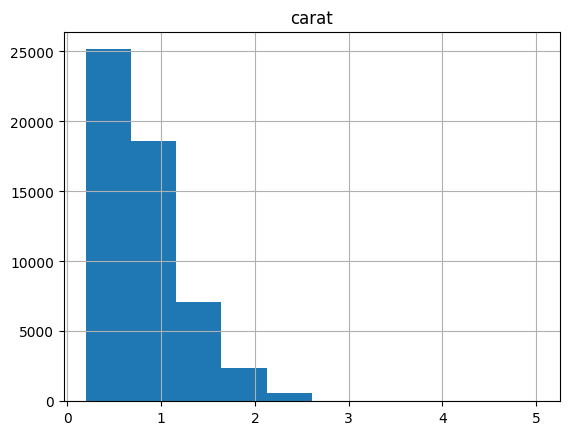

In [18]:
# ch1 exercise 8
df_diamonds.hist(column='carat')

array([[<AxesSubplot: title={'center': 'carat'}>]], dtype=object)

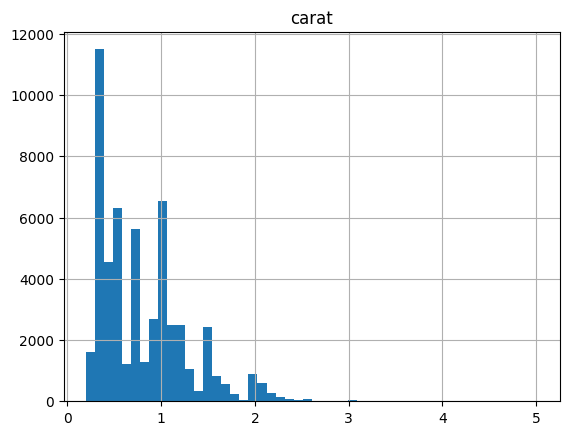

In [19]:
df_diamonds.hist(column='carat', bins=50)

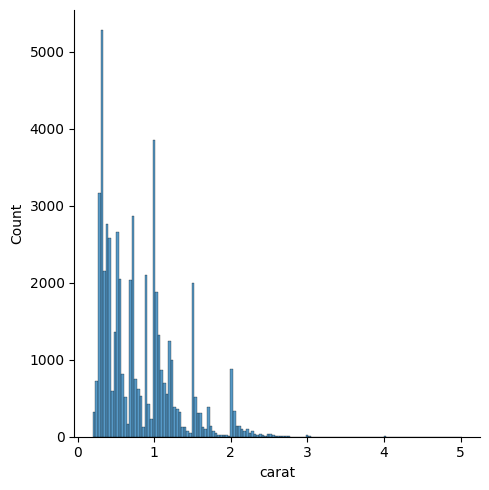

In [20]:
# sns.distplot(df_diamonds.carat)

sns.displot(df_diamonds.carat)

<AxesSubplot: xlabel='carat', ylabel='Count'>

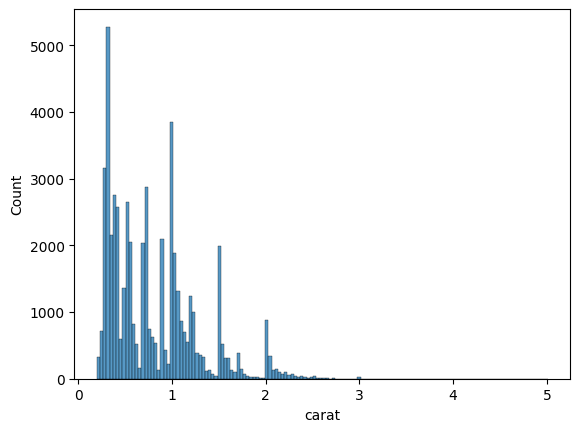

In [21]:
sns.histplot(df_diamonds.carat)

> **Kernel Density Estimation (KDE)**: A non-parametric way to estimate the probability density function of a random variable. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

> Usually KDE doesnt tell us anything more than what we can infer from the historgram itself. But, it is helpful when comparing multiple histograms on the same plot. If we want to remove the KDE and look at the histogram alone, we can use the `kde=False` parameter.


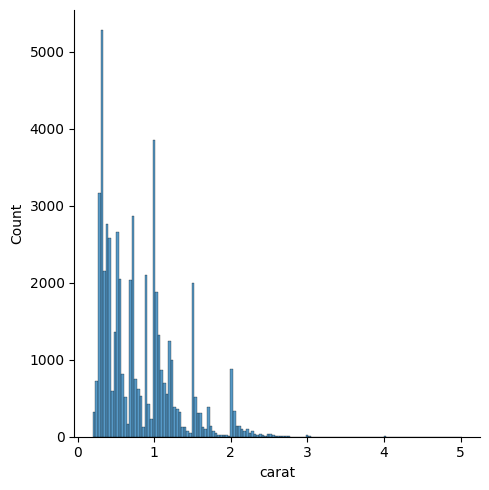

In [22]:
sns.displot(df_diamonds.carat, kde=False)

C:\Users\eorlo\AppData\Local\Temp\ipykernel_4692\162176495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diamonds.carat, kde=False)


<AxesSubplot: xlabel='carat'>

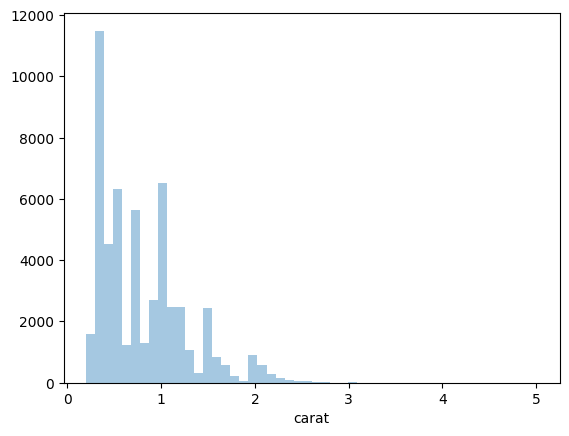

In [23]:
sns.distplot(df_diamonds.carat, kde=False)

C:\Users\eorlo\AppData\Local\Temp\ipykernel_4692\2632091723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diamonds.carat, kde=False, bins=100)


"\nThe histogram w/ 100 bins shows a better visualization of the distribution of the variable - you see there's several peaks at specific carat values.\nAnother observation is that most carat values are concentrated toward lower values and the tail is on the right, as in, it's right-skewed.\n\nA log transformation helps in identifying more trends. For instance, in the following graph, the x-axis shows log-transformed values of the `price` variable, \nand you can see that there are two peaks indicating two kinds of diamonds - one with a high price and another with a low price.\n"

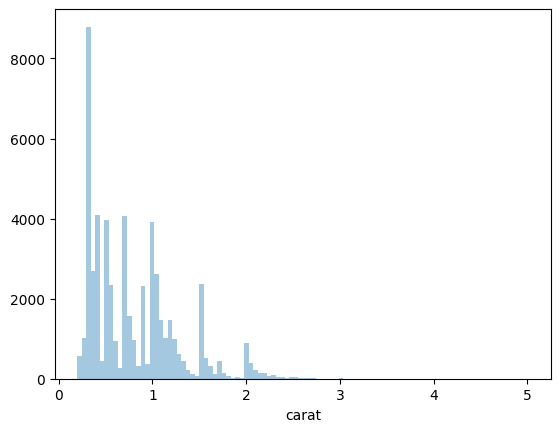

In [24]:
sns.distplot(df_diamonds.carat, kde=False, bins=100)
"""
The histogram w/ 100 bins shows a better visualization of the distribution of the variable - you see there's several peaks at specific carat values.
Another observation is that most carat values are concentrated toward lower values and the tail is on the right, as in, it's right-skewed.

A log transformation helps in identifying more trends. For instance, in the following graph, the x-axis shows log-transformed values of the `price` variable, 
and you can see that there are two peaks indicating two kinds of diamonds - one with a high price and another with a low price.
"""

C:\Users\eorlo\AppData\Local\Temp\ipykernel_4692\1432985380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_diamonds.price), kde=False)


<AxesSubplot: xlabel='price'>

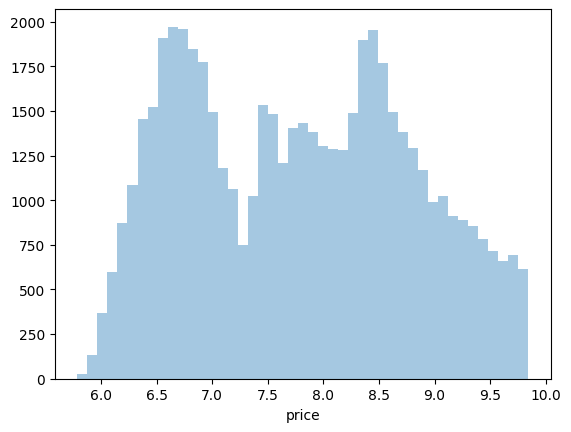

In [25]:
sns.distplot(np.log(df_diamonds.price), kde=False)


In [26]:
# ch1 exercise 9 -- Bar plots

df_diamonds9 = sns.load_dataset('diamonds')
print(df_diamonds9.cut.unique())
"""
.unique() returns an array. There are five unique cut qualities and eight unique values in `clarity`. The number of unique values can be obtained using `.nunique()` in pandas
"""

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']


'\n.unique() returns an array. There are five unique cut qualities and eight unique values in `clarity`. The number of unique values can be obtained using `.nunique()` in pandas\n'

col_0      count
cut             
Ideal      21551
Premium    13791
Very Good  12082
Good        4906
Fair        1610



['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


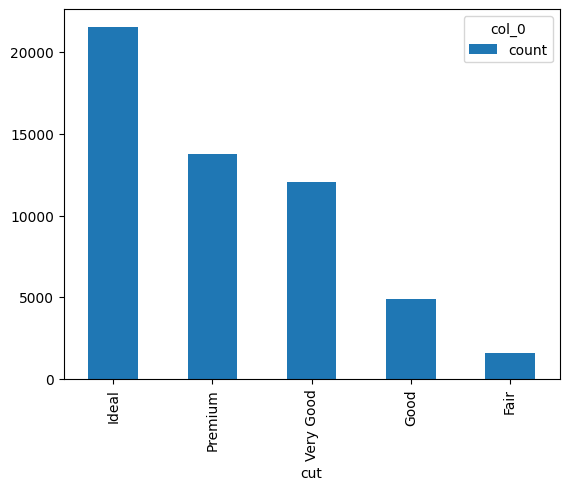

In [27]:
cut_count_table = pd.crosstab(index=df_diamonds9['cut'], columns='count')
print(cut_count_table)
cut_count_table.plot(kind='bar')

print(f"\n\n\n{df_diamonds9.clarity.unique()}")

In [28]:
# to create the same plot in seaborn:
# 7: doesnt work right:
# sns.catplot("cut", data = df_diamonds9['cut'], aspect = 1.5, kind = 'count', color = 'b')

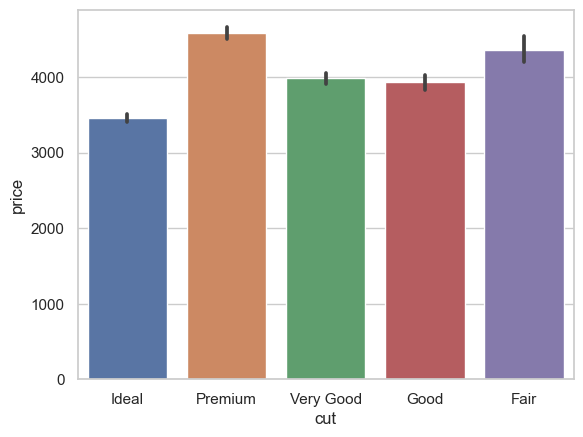

In [29]:
from numpy import median, mean

sns.set(style='whitegrid')
ax = sns.barplot(x="cut", y="price", data=df_diamonds9, estimator=mean)


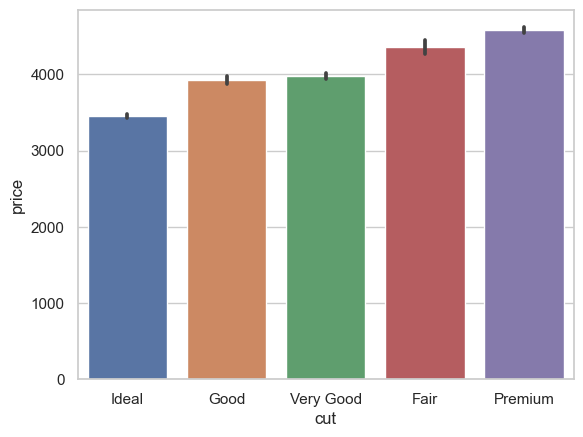

In [30]:
# Reorder the x-axis bars using `order`
# ax = sns.barplot(x = 'cut', y = 'price', data = df_diamonds9, estimator = mean, ci = 68, order = ['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])

# Note: ci = 68 is deprecated, use errorbar = ('ci', 68) instead
ax = sns.barplot(x='cut',
                 y='price',
                 data=df_diamonds9,
                 estimator=mean,
                 errorbar=("ci", 68),
                 order=['Ideal', 'Good', 'Very Good', 'Fair', 'Premium'])


'\nYou can see that the price patterns for diamonds of different colors are similar for each cut quality. For instance, for `Ideal` diamonds, the price distribution\nof diamonds of different colors is the same as that for `Premium`, and other diamonds.\n'

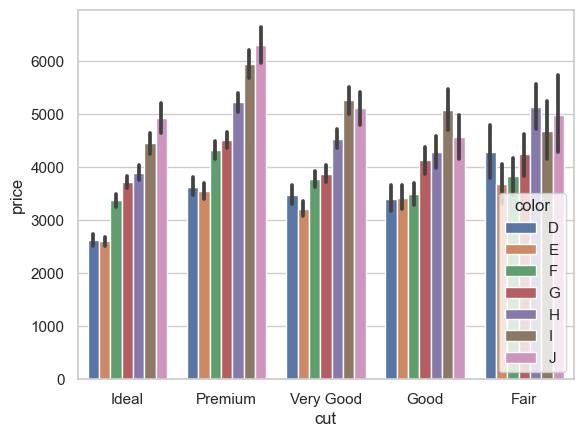

In [31]:
# ch1 exercise 10 -- Bar plots grouped by specific feature
diamond_df = sns.load_dataset('diamonds')

ax = sns.barplot(x='cut', y='price', hue='color', data=diamond_df)
"""
You can see that the price patterns for diamonds of different colors are similar for each cut quality. For instance, for `Ideal` diamonds, the price distribution
of diamonds of different colors is the same as that for `Premium`, and other diamonds.
"""

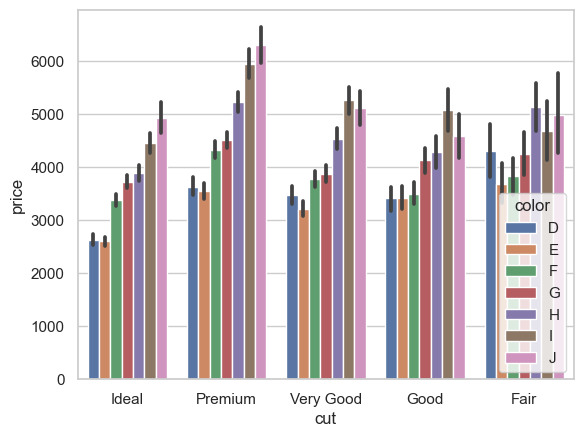

In [32]:
#ch1 exercise 11 -- Tweaking plot params of a grouped bar plot
diamond_df = sns.load_dataset('diamonds')

ax = sns.barplot(x='cut', y='price', hue='color', data=diamond_df)


'\n`ncol` param denotes the number of columns in which the legend are to be organized, and the `loc` param specifies the location\nof the legend and can take any one of eight values (upper left, lower center, etc)\n'

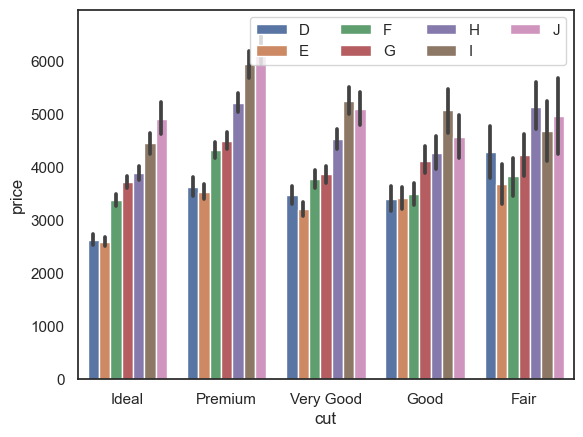

In [33]:
# place the legend appropriately on the bar plot
sns.set_style('white')
ax = sns.barplot(x='cut', y='price', hue='color', data=diamond_df)
ax.legend(loc='upper right', ncol=4)
"""
`ncol` param denotes the number of columns in which the legend are to be organized, and the `loc` param specifies the location
of the legend and can take any one of eight values (upper left, lower center, etc)
"""

Text(0, 0.5, 'Price')

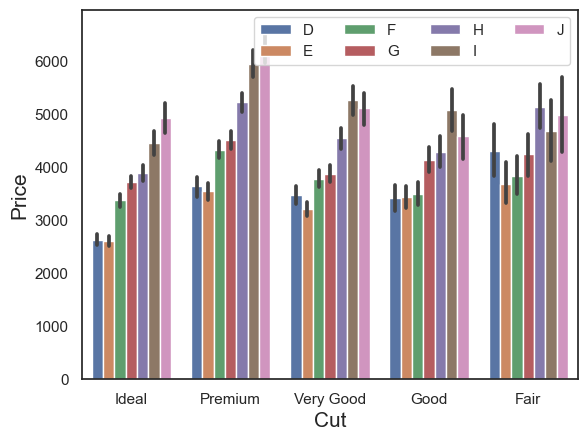

In [34]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamond_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize': 15})
ax.set_ylabel('Price', fontdict={'fontsize': 15})


[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

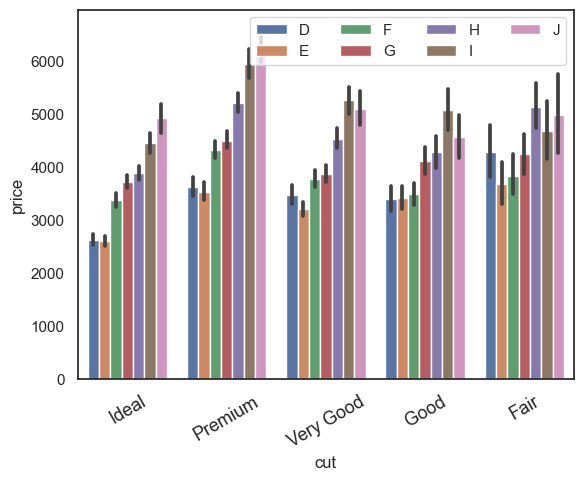

In [35]:
# Modify the fontsize and rotation of the x-axis of the tick labels
ax = sns.barplot(x='cut', y='price', hue='color', data=diamond_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=30)


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


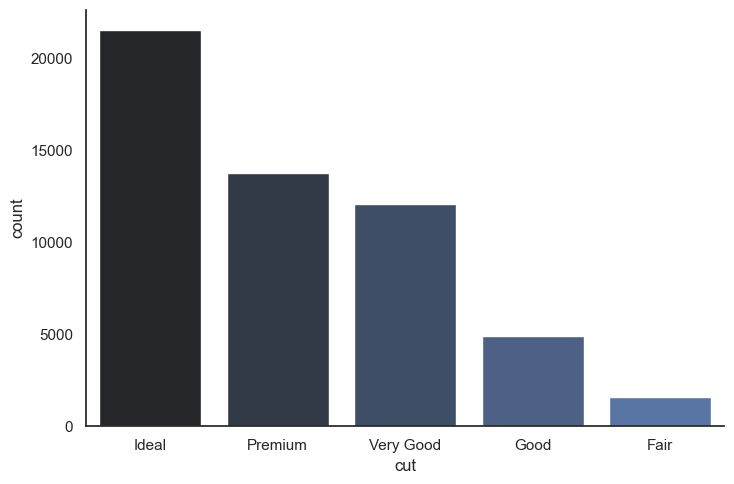

In [36]:
# exercise 12 - annotating a bar plot
diamond_df = sns.load_dataset('diamonds')
print(diamond_df)

ax = sns.catplot(data=diamond_df,
                 x="cut",
                 kind="count",
                 aspect=1.5,
                 palette='dark:b')


In [37]:
# annotate the column belonging to the `Ideal` category.
# get records in the df corresponding to ideal cut
ideal_group = diamond_df.loc[diamond_df['cut'] == 'Ideal']

x = ideal_group.index.tolist()[0]
y = len(ideal_group)

print(f"x: {x}\ny: {y}")

x: 0
y: 21551


Text(0.3, 23551, 'excellent polish & symmetry ratings;\nreflects almost all the light that enters it')

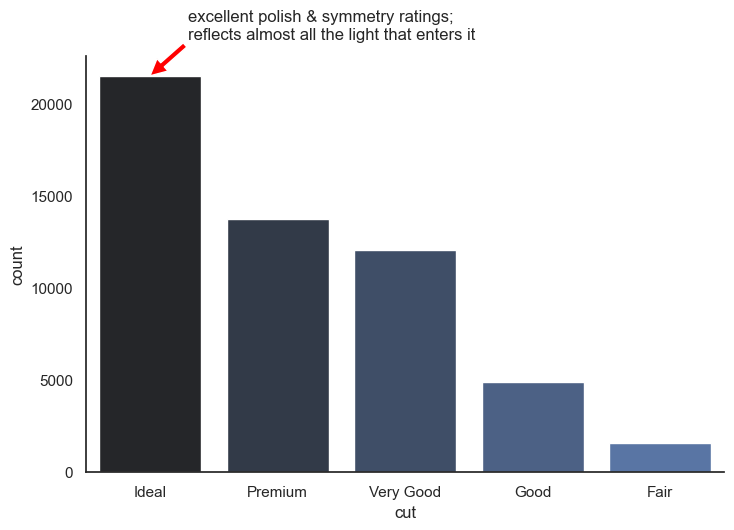

In [43]:
# annotate the plot with any note or extra info
from matplotlib import pyplot as plt

sns.catplot(data=diamond_df,
            x='cut',
            kind='count',
            aspect=1.5,
            palette='dark:b')

plt.annotate(
    'excellent polish & symmetry ratings;\nreflects almost all the light that enters it',
    xy = (x, y),
    xytext = (x + 0.3, y + 2000),
    # arrowprops = dict(facecolor= 'red')  # <== old way (in book) ... dict() is deprecated, use {} instead 
    arrowprops = {"facecolor": 'red'}
)


## Activity 1: Analyzing Different Scenarios and Generating the Appropriate Visualization

> We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:
1. Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2. Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3. Find out which national teams won the largest number of medals in the top five sports in 2016.
4. Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

> ### High-Level Steps

1. Download the dataset and format it as a pandas DataFrame.
2. Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3. Find out the medals awarded in 2016 for each sport.
4. List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2017.
5. Generate a bar plot of record counts corresponding to each of the top five sports.
6. Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7. Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8. Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [44]:
# ACtivity 1:
# get the 'athlete_events.csv' from gh
olympics_df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/athlete_events.csv')
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [45]:
# 2. Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
# filter df to contain medal winners only; use inplace!
olympic_winners = olympics_df.dropna(subset=['Medal'])
olympic_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [52]:
# 3. Find out the medals awarded in 2016 for each sport.

olympic_winners2016 = olympic_winners[(olympic_winners['Year'] == 2016)]
olympic_winners2016.Sport.value_counts()

Sport
Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: co

In [54]:
# 4. List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2017.
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

olympic_TopSport_winners_2016 = olympic_winners2016[(olympic_winners2016['Sport']).isin(top_sports)]
olympic_TopSport_winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


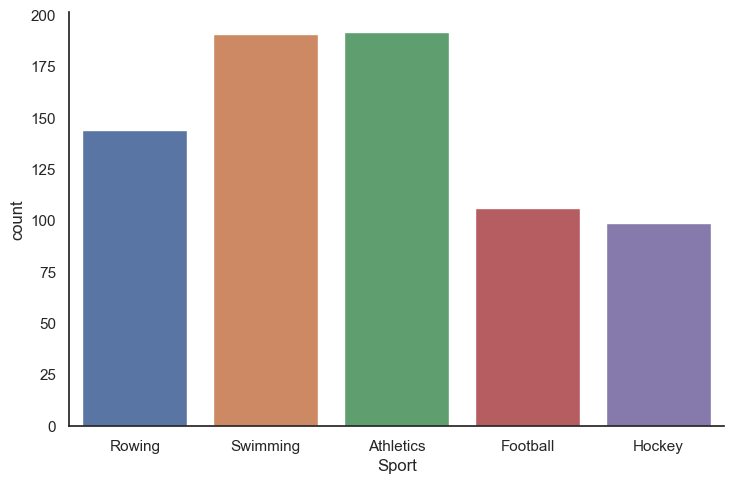

In [55]:
# 5. Generate a bar plot of record counts corresponding to each of the top five sports.
plot = sns.catplot(data = olympic_TopSport_winners_2016, x = 'Sport', kind = 'count', aspect = 1.5)

C:\Users\eorlo\AppData\Local\Temp\ipykernel_4692\2560430691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(olympic_TopSport_winners_2016['Age'], kde = False)


<AxesSubplot: xlabel='Age'>

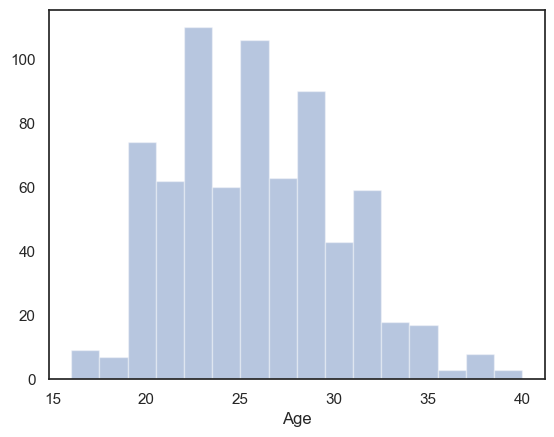

In [62]:
# 6. Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
sns.distplot(olympic_TopSport_winners_2016['Age'], kde = False)
# sns.displot(olympic_TopSport_winners_2016['Age'], kde = False)
# sns.histplot(olympic_TopSport_winners_2016['Age'], kde = False, stat = 'density')
# sns.histplot(olympic_TopSport_winners_2016['Age'], kde = False)

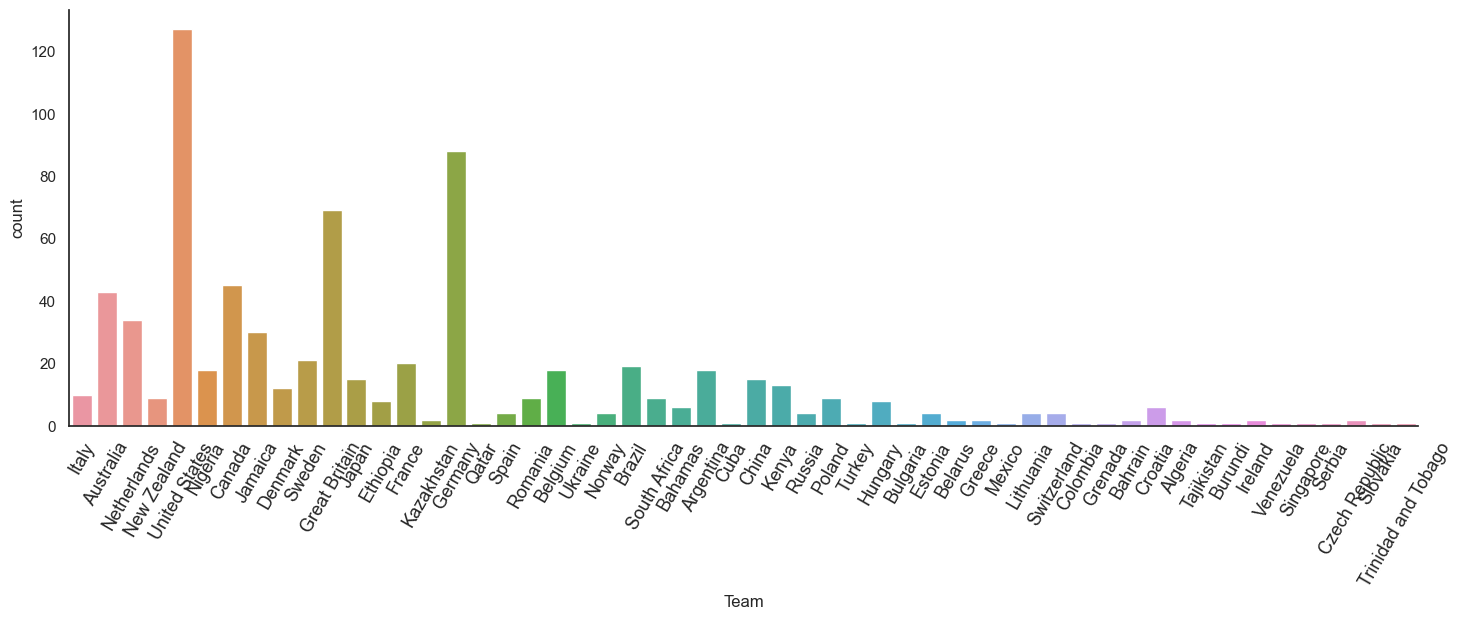

In [65]:
# 7. Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
plts = sns.catplot(data = olympic_TopSport_winners_2016, x = 'Team', kind = 'count', aspect = 3)
plts.set_xticklabels(fontsize = 13, rotation = 60)

<AxesSubplot: xlabel='Sport', ylabel='Weight'>

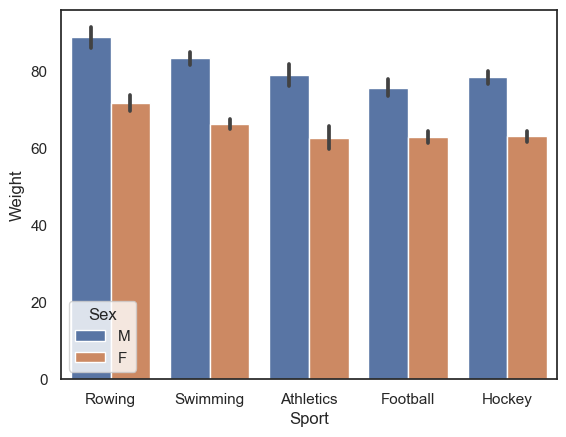

In [66]:
# 8. Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.
sns.barplot(x = "Sport", y = "Weight", data = olympic_TopSport_winners_2016, estimator = np.mean, hue = 'Sex') # gender